## CHILDES Corpus Analyses: the emergence of word classes

Child language develops rapidly between the ages of 24-60 months, reaching several key milestones: the emergence and rapid expansion of new word classes for both content (e.g. noun, verb, adjective) and function (e.g. prepositions, pronouns, determiners) words. The Child Language Data Exchange System (CHILDES) is a corpus containing transcripts from child language research that has been tagged for word classes by a parser (MacWhinney & Snow, 1990).

Language development proceeds along several key stages:<p>
<strong>the one-word or holophrastic stage</strong> between 9-8 months<p>
<strong>the two-word stage</strong> between 18-24 months<p>
<strong>the telegraphic stage</strong> between 24-30 months.<p>
    
Prior to the age of 24 months, infants typically communicate with content words only. However, at the age of 24 months (2 years), language begins to develop rapidly, reaching several key milestones before 60 months (5 years).

### The emergence of grammar: content and function words

In English, word classes can be divided into two broad types: <strong>content</strong> words and <strong>function</strong> words.

<strong>Content</strong> words (e.g, nouns, verbs, adjectives) primarily contribute semantic information.<p> 
<strong> Function</strong> items (e.g., prepositions and determiners) primarily contribute grammatical information.<p>

Before 24 months, children mostly communicate with content words. Between 24-36 months, early grammatical structure first emerges in the form of function words.

### CHILDES English word classes
Table 1. (MacWhinney, 2000)

| Category | Code |
|---|---|
| Adjective | adj |
| Adjective – Predicative | adj:pred |
| Adverb | adv |
| Adverb – Temporal | adv:tem |
| Communicator | co |
| Complementizer | comp |
| Conjunction | conj |
| Coordinator | coord |
| Determiner Article | det:art |
| Determiner – Demonstrative | det:dem |
| Determiner – Interrogative | det:int | 
| Determiner – Numeral | det:num |
| Determiner – Possessive | det:poss |
| Filler | fil |
| Infinitive | inf |
| Negative | neg |
| Noun | n |
| Noun – letter | n:let |
| Noun - plurale tantum | n:pt | 
| Proper Noun | n:prop | 
| Onomatopoeia | on | 
| Particle | part |
| Postmodifier | post | 
| Preposition | prep |
| Pronoun – demonstrative | pro:dem |
| Pronoun – existential | pro:exist | 
| Pronoun – indefinite | pro:indef |
| Pronoun – interrogative | pro:int | 
| Pronoun – object | pro:obj |
| Pronoun – personal | pro:per |
| Pronoun – possessive | pro:poss | 
| Pronoun – reflexive | pro:refl | 
| Pronoun – relative | pro:rel |
| Pronoun – subject | pro:sub | 
| Quantifier | qn |
| Verb| v| 
| Verb - auxiliary| aux| 
| Verb - copula| cop| 
| Verb - modal| mod| 


### Questions for Exploration:
The following analysis is based on the Braunwald corpus. It is a longitudinal study of 33 participants between the ages of 2-5 years in two visits.

342 transcripts were included. 250 transcripts were collected between 2-3 years of age (24-35 mos); 92 transcripts were collected between 3-5 years of age (26-60 mos).  

1) At <strong>what age</strong> do different word classes emerge?<p>
2) Which subclasses of <strong>content words</strong> are most represented in the child's vocabulary?<p>
3) Which subclasses of <strong>function words</strong> are most represented in the child's vocabulary?<p>
4) What is the <strong>relationship </strong>between the appearance of <strong>content and function words and length of the utterance?</strong>


_(N.B. This analysis was created three weeks into learning Python during the summer of 2020 for a data science course. It could be cleaner with repetition structures. Scroll to the bottom for visualizations.)_

In [1968]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

# Create arrays for parts of speech
FNAME=[]
SEX=[]
AGE_IN_MOS=[]
NAME=[]
LENGTH=[]
DETART=[]
DETDEM=[]
DETINT=[]
DETNUM=[]
DETPOSS=[]
PRODEM=[]
PROEXIST=[]
PROINDEF=[]
PROINT=[]
PROOBJ=[]
PROPER=[]
PROPOSS=[]
PROREFL=[]
PROREL=[]
PROSUB=[]
PREP=[]
QN=[]
AUX=[]
MOD=[]
ADJ=[]
ADJP=[]
ADV=[]
ADVT=[]
CO=[]
COMP=[]
CONJ=[]
COORD=[]
FIL=[]
INF=[]
NEG=[]
N=[]
NLET=[]
NPT=[]
NPROP=[]
ON=[]
PART=[]
POST=[]
V=[]
VCOP=[]
ADVADJ=[]
ADVINT=[]
ADVLOC=[]
DETTOTAL=[]
PROTOTAL=[]
AUXMODTOTAL=[]
ADJVTOTAL=[]

punc = [",",".","!","?","+","/","~"] # punctuation as STOP tokens

folder_path = 'C:/Users/user/OneDrive/Documents/ExLing Lab/Code Samples/Final Project Function Items'
for filename in glob.glob(os.path.join(folder_path, '*.txt')):
    with open(filename, 'r', encoding="utf8") as f:
        text = f.read()
        FNAME.append(filename)
    data = text.splitlines()
    det_art_count=0
    det_dem_count=0
    det_int_count=0
    det_num_count=0
    det_poss_count=0
    pro_dem_count=0
    pro_exist_count=0
    pro_indef_count=0
    pro_int_count=0
    pro_obj_count=0
    pro_per_count=0
    pro_poss_count=0
    pro_refl_count=0
    pro_rel_count=0
    pro_sub_count=0
    prep_count=0
    qn_count=0
    aux_count=0
    mod_count=0
    length=0
    update=0
    adj_count=0
    adjp_count=0
    adv_count=0
    advt_count=0
    co_count=0
    comp_count=0
    conj_count=0
    coord_count=0
    fil_count=0
    inf_count=0
    neg_count=0
    n_count=0
    nlet_count=0
    npt_count=0
    nprop_count=0
    on_count=0
    part_count=0
    post_count=0
    v_count=0
    vcop_count=0
    adv_adj_count=0
    adv_int_count=0
    adv_loc_count=0

    for line in data:
        if "@Participants" in line:
            startpos = line.find("CHI")
            endpos = line.find("Target")
            name = line[startpos+4:endpos]
            NAME.append(name)
        if "@ID" in line:
            if "Target_Child" in line:
                words = line.split('|')
                age = words[3]
                sep = age.split(';')
                daysroundoff = float(sep[1])
                daysroundoff = round(daysroundoff,0)
                mos = (int(sep[0])*12) + float(daysroundoff)
                sex = words[4]
                AGE_IN_MOS.append(mos)
                SEX.append(sex)
        if '*CHI' in line:
            pos = data.index(line)
            morph = (data[pos+1])
            if '%mor' in morph:
                split = morph.split()
                split2 = split[1:]
                length = len(split2)
                for word in split2:
                    for char in punc:
                        if char in word:
                            length = length - 1
                            update = update + length
# section too long, this was my fourth week of learning Python. I'd handle this with a function.
                if 'det:art|' in morph:
                    det_art_count = det_art_count + 1
                if 'det:int' in morph:
                    det_int_count = det_int_count + 1
                if 'det:num|' in morph:
                    det_num_count = det_num_count + 1
                if 'det:dem|' in morph:
                    det_dem_count = det_dem_count + 1
                if 'det:poss|' in morph:
                    det_poss_count = det_poss_count + 1
                if 'pro:dem|' in morph:
                    pro_dem_count = pro_dem_count + 1
                if 'pro:exist|' in morph:
                    pro_exist_count = pro_exist_count + 1
                if 'pro:indef|' in morph:
                    pro_indef_count = pro_indef_count + 1
                if 'pro:int|' in morph:
                    pro_int_count = pro_int_count + 1
                if 'pro:obj|' in morph:
                    pro_obj_count = pro_obj_count + 1
                if 'pro:per|' in morph:
                    pro_per_count = pro_per_count + 1
                if 'pro:poss|' in morph:
                    pro_poss_count = pro_poss_count + 1
                if 'pro:refl|' in morph:
                    pro_refl_count = pro_refl_count + 1
                if 'pro:rel|' in morph:
                    pro_rel_count = pro_rel_count + 1
                if 'pro:sub|' in morph:
                    pro_sub_count = pro_sub_count + 1
                if 'prep|' in morph:
                    prep_count = prep_count + 1
                if 'qn|' in morph:
                    qn_count = qn_count + 1
                if 'aux|' in morph:
                    aux_count = aux_count + 1
                if 'mod|' in morph:
                    mod_count = mod_count + 1
                if 'adj|' in morph:
                    adj_count = adj_count + 1
                if 'adj:pred|' in morph:
                    adjp_count = adjp_count + 1
                if 'adv|' in morph:
                    adv_count = adv_count + 1
                if 'adv:tem|' in morph:
                    advt_count = advt_count + 1
                if 'co|' in morph:
                    co_count = co_count + 1
                if 'comp|' in morph:
                    comp_count = comp_count + 1
                if 'conj|' in morph:
                    conj_count = conj_count + 1
                if 'coord|' in morph:
                    coord_count = coord_count + 1
                if 'fil|' in morph:
                    fil_count = fil_count + 1
                if 'inf|' in morph:
                    inf_count = inf_count + 1
                if 'neg|' in morph:
                    neg_count = neg_count + 1
                if (('n|' in morph) and ('qn|' not in morph) and ('on|' not in morph)):
                    n_count = n_count + 1
                if 'n:let|' in morph:
                    nlet_count = nlet_count + 1
                if 'n:pt|' in morph:
                    npt_count = npt_count + 1
                if 'n:prop|' in morph:
                    nprop_count = nprop_count + 1
                if 'on|' in morph:
                    on_count = on_count + 1
                if 'part|' in morph:
                    part_count = part_count + 1
                if 'post|' in morph:
                    post_count = post_count + 1
                if (('v|' in morph) and ('adv|' not in morph)):
                    v_count = v_count + 1
                if 'cop|' in morph:
                    vcop_count = vcop_count + 1
                if 'adv:adj|' in morph:
                    adv_adj_count = adv_adj_count + 1
                if 'adv:int|' in morph:
                    adv_int_count = adv_int_count + 1
                if 'adv:loc|' in morph:
                    adv_loc_count = adv_loc_count
    DETART.append(det_art_count)
    DETINT.append(det_int_count)
    DETNUM.append(det_num_count)
    DETDEM.append(det_dem_count)
    DETPOSS.append(det_poss_count)
    PRODEM.append(pro_dem_count)
    PROEXIST.append(pro_exist_count)
    PROINDEF.append(pro_indef_count)
    PROINT.append(pro_int_count)
    PROOBJ.append(pro_obj_count)
    PROPER.append(pro_per_count)
    PROPOSS.append(pro_poss_count)
    PROREFL.append(pro_refl_count)
    PROREL.append(pro_rel_count)
    PROSUB.append(pro_sub_count)
    PREP.append(prep_count) 
    QN.append(qn_count)
    AUX.append(aux_count)
    MOD.append(mod_count)
    LENGTH.append(update)
    ADJ.append(adj_count+adjp_count)
    ADV.append(adv_count)
    ADVT.append(advt_count)
    CO.append(co_count)
    COMP.append(comp_count)
    CONJ.append(conj_count)
    COORD.append(coord_count)
    FIL.append(fil_count)
    INF.append(inf_count)
    NEG.append(neg_count)
    N.append(n_count+nlet_count+npt_count+nprop_count)
    ON.append(on_count)
    PART.append(part_count)
    POST.append(post_count)
    V.append(v_count)
    VCOP.append(vcop_count)
    ADVADJ.append(adv_adj_count)
    ADVINT.append(adv_int_count)
    ADVLOC.append(adv_loc_count)
    DETTOTAL.append(det_art_count+det_dem_count+det_int_count+det_num_count)
    PROTOTAL.append(pro_dem_count+pro_exist_count+pro_indef_count+pro_int_count+pro_obj_count+pro_per_count+pro_poss_count+pro_refl_count+pro_rel_count+pro_sub_count)
    AUXMODTOTAL.append(aux_count+mod_count)
    ADJVTOTAL=(adj_count+adjp_count+adv_count+advt_count+adv_adj_count+adv_int_count+adv_loc_count)

In [1969]:
df=pd.DataFrame()
df["Filename"] = FNAME
df["Name"] = NAME
df["Age in Months"] = AGE_IN_MOS
df["Sex"] = SEX
df['Length'] = LENGTH
df['Det_art'] = DETART
df['Det_dem'] = DETDEM
df['Det_int'] = DETINT
df['Det_num'] = DETNUM
df['Det_poss'] = DETPOSS
df['Pro_dem'] = PRODEM
df['Pro_exist'] = PROEXIST
df['Pro_indef'] = PROINDEF
df['Pro_int'] = PROINT
df['Pro_obj'] = PROOBJ
df['Pro_per'] = PROPER
df['Pro_poss'] = PROPOSS
df['Pro_refl'] = PROREFL
df['Pro_rel'] = PROREL
df['Pro_sub'] = PROSUB
df['Prep'] = PREP
df['Qn'] = QN
df['Aux'] = AUX
df['Mod'] = MOD
df['Adj'] = ADJ
df['Adv'] = ADV
df['Adv_t'] = ADVT
df['Co'] = CO
df['Comp'] = COMP
df['Conj'] = CONJ
df['Coord'] = COORD
df['Fil'] = FIL
df['Inf'] = INF
df['Neg'] = NEG
df['N'] = N
df['On'] = ON
df['Part'] = PART
df['Post'] = POST
df['V'] = V
df['V_cop'] = VCOP
df['Adv_adj'] = ADVADJ
df['Adv_int'] = ADVINT
df['Adv_loc'] = ADVLOC
df['Det_total'] = DETTOTAL
df['Pro_total'] = PROTOTAL
df['Aux_mod_total'] = AUXMODTOTAL
df['Adjv_total'] = ADJVTOTAL

In [1970]:
# Calculates each world class as a proportion of the total.
ratio = df
ratio.loc[:, 'Det_art':'Adjv_total'] = df.loc[:, 'Det_art':'Adjv_total'].div(df.Length, axis=0)
ratio.reset_index()
# ratio_melt=ratio.melt(ratio, id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
melt = pd.melt(ratio)
melt

,variable,value
0,Filename,C:/Users/user/OneDrive/Documents/ExLing Lab/Co...
1,Filename,C:/Users/user/OneDrive/Documents/ExLing Lab/Co...
2,Filename,C:/Users/user/OneDrive/Documents/ExLing Lab/Co...
3,Filename,C:/Users/user/OneDrive/Documents/ExLing Lab/Co...
4,Filename,C:/Users/user/OneDrive/Documents/ExLing Lab/Co...
...,...,...
16069,Adjv_total,0.00787402
16070,Adjv_total,0.00970874
16071,Adjv_total,0.0208333
16072,Adjv_total,0.010989


In [1971]:
# Calculates quartiles for length of utterance.
length_ratio = ratio
length_ratio = length_ratio.reset_index()
length_ratio = length_ratio.set_index('Name')
length_ratio.Length.quantile([0.33,0.66])

0.33     85.53
0.66    172.06
Name: Length, dtype: float64

In [1972]:
# Adds label of length "low, medium, high" to length data based on quartiles.
length_ratio = length_ratio.sort_values('Length')
length_ratio['Length_Type'] = ''
mask = length_ratio.Length <= 85.53
length_ratio.loc[mask, 'Length_Type'] = 'low'
mask = (length_ratio.Length > 85.53) & (length_ratio.Length < 172.06)
length_ratio.loc[mask, 'Length_Type'] = 'medium'
mask = length_ratio.Length >= 172.06
length_ratio.loc[mask, 'Length_Type'] = 'high'

# Sums up total of function and content words.
func = ['Det_art','Det_dem','Det_int',"Det_num","Det_poss","Pro_dem","Pro_exist","Pro_indef","Pro_int","Pro_obj","Pro_per","Pro_poss","Pro_refl","Pro_rel","Pro_sub","Prep","Qn","Aux","Mod","Comp","Conj","Coord"]
cont = ['Adj', 'Adv','Adv_t','Fil',"Inf","Neg","N","On","Part","Post","V","V_cop","Adv_adj","Adv_int","Adv_loc"]
length_ratio['FTotal']=length_ratio[func].sum(axis=1)
length_ratio['CTotal']=length_ratio[cont].sum(axis=1)

In [1973]:
# Creates version of dataframe with labeled observations as "content" or "function".
length_ratio_drop = length_ratio.reset_index()
length_ratio_drop = length_ratio_drop.drop(['Filename','Name'],axis=1)
func_melt = ['Age in Months','Length','Length_Type','Sex','Det_art','Det_dem','Det_int',"Det_num","Det_poss","Pro_dem","Pro_exist","Pro_indef","Pro_int","Pro_obj","Pro_per","Pro_poss","Pro_refl","Pro_rel","Pro_sub","Prep","Qn","Aux","Mod","Comp","Conj","Coord"]
cont_melt = ['Age in Months', 'Length','Length_Type','Sex', 'Adj', 'Adv','Adv_t','Fil',"Inf","Neg","N","On","Part","Post","V","V_cop","Adv_adj","Adv_int","Adv_loc"]
func_words = length_ratio_drop[func_melt].copy()
func_age = func_words.melt(id_vars='Age in Months',value_vars=func)
func_length = func_words.melt(id_vars='Length',value_vars=func)
func_length_type = func_words.melt(id_vars='Length_Type',value_vars=func)
func_sex = func_words.melt(id_vars='Sex',value_vars=func)
func_words = pd.concat([func_age['Age in Months'],func_sex['Sex'],func_length['Length'], func_length_type['Length_Type'],func_age['value']],axis=1)
func_words.columns = ['Age in Months','Sex','Length','Length_Type','Ratio']
func_words['Type']='function'

cont_words = length_ratio_drop[cont_melt].copy()
cont_age = cont_words.melt(id_vars='Age in Months',value_vars=cont)
cont_length = cont_words.melt(id_vars='Length',value_vars=cont)
cont_length_type = cont_words.melt(id_vars='Length_Type',value_vars=cont)
cont_sex = cont_words.melt(id_vars='Sex',value_vars=cont)
cont_words = pd.concat([cont_age['Age in Months'],cont_sex['Sex'],cont_length['Length'], cont_length_type['Length_Type'],cont_age['value']],axis=1)
cont_words.columns = ['Age in Months','Sex','Length','Length_Type','Ratio']
cont_words['Type']='content'
cont_words

all_words=pd.concat([func_words,cont_words])

In [1974]:
# Creates mean of word classes
ratio_means = ratio.groupby('Age in Months').mean()
all_ratio = pd.DataFrame(ratio_means)
all_ratio = all_ratio.drop("Length", axis=1)
all_ratio = all_ratio.reset_index()
all_ratio = all_ratio.set_index('Age in Months')

In [1975]:
# groups ratio of word classes by age
grouped_ratio = ratio.groupby('Age in Months')
DETART_MEANR = grouped_ratio.Det_art.mean()
DETDEM_MEANR = grouped_ratio.Det_dem.mean()
DETINT_MEANR = grouped_ratio.Det_int.mean()
DETNUM_MEANR = grouped_ratio.Det_num.mean()
DETPOSS_MEANR = grouped_ratio.Det_poss.mean()
PRODEM_MEANR = grouped_ratio.Pro_dem.mean()
PROEXIST_MEANR = grouped_ratio.Pro_exist.mean()
PROINDEF_MEANR = grouped_ratio.Pro_indef.mean()
PROINT_MEANR = grouped_ratio.Pro_int.mean()
PROOBJ_MEANR = grouped_ratio.Pro_obj.mean()
PROPER_MEANR = grouped_ratio.Pro_per.mean()
PROPOSS_MEANR = grouped_ratio.Pro_poss.mean()
PROREFL_MEANR = grouped_ratio.Pro_refl.mean()
PROREL_MEANR = grouped_ratio.Pro_rel.mean()
PROSUB_MEANR = grouped_ratio.Pro_sub.mean()
PREP_MEANR = grouped_ratio.Prep.mean()
QN_MEANR = grouped_ratio.Qn.mean()
AUX_MEANR = grouped_ratio.Aux.mean()
MOD_MEANR = grouped_ratio.Mod.mean()
LENGTH_MEANR = grouped_ratio.Length.mean()
ADJ_MEANR = grouped_ratio.Adj.mean()
ADV_MEANR = grouped_ratio.Adv.mean()
ADVT_MEANR = grouped_ratio.Adv_t.mean()
CO_MEANR = grouped_ratio.Co.mean()
COMP_MEANR = grouped_ratio.Comp.mean()
CONJ_MEANR = grouped_ratio.Conj.mean()
COORD_MEANR = grouped_ratio.Coord.mean()
FIL_MEANR = grouped_ratio.Fil.mean()
INF_MEANR = grouped_ratio.Inf.mean()
NEG_MEANR = grouped_ratio.Neg.mean()
N_MEANR = grouped_ratio.N.mean()
ON_MEANR = grouped_ratio.On.mean()
PART_MEANR = grouped_ratio.Part.mean()
POST_MEANR= grouped_ratio.Post.mean()
V_MEANR = grouped_ratio.V.mean()
VCOP_MEANR = grouped_ratio.V_cop.mean()
ADVADJ_MEANR = grouped_ratio.Adv_adj.mean()
ADVINT_MEANR = grouped_ratio.Adv_int.mean()
ADVLOC_MEANR = grouped_ratio.Adv_loc.mean()
DETTOTAL_MEANR = grouped_ratio.Det_total.mean()
PROTOTAL_MEANR = grouped_ratio.Pro_total.mean()
AUXMODTOTAL_MEANR = grouped_ratio.Aux_mod_total.mean()
ADJVTOTAL_MEANR = grouped_ratio.Adjv_total.mean()

In [1976]:
# Compares at proportion of function words to all word classes.
function_ratio = pd.DataFrame({
                        "Det_art Mean": DETART_MEANR,
                        "Det_dem Mean": DETDEM_MEANR,
                        "Det_int Mean": DETINT_MEANR,
                        "Det_num Mean": DETNUM_MEANR,
                        "Det_poss Mean": DETPOSS_MEANR,
                        "Pro_dem Mean": PRODEM_MEANR,
                        "Pro_exist Mean": PROEXIST_MEANR,
                        "Pro_indef Mean": PROINDEF_MEANR,
                        "Pro_int Mean": PROINT_MEANR,
                        "Pro_obj Mean": PROOBJ_MEANR,
                        "Pro_per Mean": PROPER_MEANR,
                        "Pro_poss Mean": PROPOSS_MEANR,
                        "Pro_refl Mean": PROREFL_MEANR,
                        "Pro_rel Mean": PROREL_MEANR,
                        "Pro_sub Mean": PROSUB_MEANR,
                        "Prep Mean": PREP_MEANR,
                        "Qn Mean": QN_MEANR,
                        "Aux Mean": AUX_MEANR,
                        "Mod Mean": MOD_MEANR,
                        "Comp Mean": COMP_MEANR,
                        "Conj Mean": CONJ_MEANR,
                        "Coord Mean": COORD_MEANR,
                        })

In [1977]:
# Compare types of content words used over time
contenttype_ratio = pd.DataFrame({
                        "Adj/Adv Total": ADJVTOTAL_MEANR,
                        "Verb Total": (INF_MEANR + V_MEANR + VCOP_MEANR), 
                        "N Mean": N_MEANR,
                        })
contenttype_ratio = contenttype_ratio.reset_index()
contenttype_ratio = contenttype_ratio.set_index("Age in Months")

In [1978]:
# Compares function words by class over time
functiontype_ratio = pd.DataFrame({"Determiner Mean": DETTOTAL_MEANR,
                                 "Pronoun Mean": PROTOTAL_MEANR,
                                 "Auxiliary Verb Mean": AUXMODTOTAL_MEANR,
                                 "Prep Mean": PREP_MEANR,
                                 "Qn Mean": QN_MEANR,
                                 "Comp Mean": COMP_MEANR,
                                 "Conj Mean": CONJ_MEANR,
                                 "Coord Mean": COORD_MEANR,
                                })
functiontype_ratio = functiontype_ratio.reset_index()
functiontype_ratio = functiontype_ratio.set_index("Age in Months")

In [1979]:
# Compares proportion of content words to total words.
content_ratio = pd.DataFrame({
                        'Adj Mean': ADJ_MEANR,
                        "Adv Mean": ADV_MEANR,
                        "Adv_t Mean": ADVT_MEANR,
                        "Fil Mean": FIL_MEANR,
                        "Inf Mean": INF_MEANR,
                        "Neg Mean": NEG_MEANR,
                        "N Mean": N_MEANR,
                        "On Mean": ON_MEANR,
                        "Part Mean": PART_MEANR,
                        "Post Mean": POST_MEANR,
                        "V Mean": V_MEANR,
                        "V_cop Mean": VCOP_MEANR,
                        "Adv_adj Mean": ADVADJ_MEANR,
                        "Adv_int Mean": ADVINT_MEANR,
                        "Adv_loc Mean": ADVLOC_MEANR    
                        })
content_ratio = content_ratio.reset_index()
content_ratio = content_ratio.set_index('Age in Months')

In [1980]:
# Calculates the proportion of total function and total content words.

FTOTAL = function_ratio.sum(axis=1)
function_ratio['FTotal'] = FTOTAL
function_ratio = function_ratio.reset_index()
function_ratio = function_ratio.set_index('Age in Months')

CTOTAL = content_ratio.sum(axis=1)
content_ratio['CTotal'] = CTOTAL
content_ratio = content_ratio.reset_index()

# Compares proportion of function words vs. content words over time.
con_fun_total = pd.DataFrame({
                              "Content Total": CTOTAL,
                              "Function Total": FTOTAL
})
con_fun_total = con_fun_total.reset_index()
con_fun_total = con_fun_total.set_index('Age in Months')

## Proportion of word classes by age over time: all participants

The graph below shows the proportion of word classes (see Table 1) compared to total word classes for all children as a function of age in months.

The top four word classes appear to be the following:
- <strong>nouns</strong>,
- <strong>verbs</strong>,  
- <strong>communicators</strong> (e.g., "aha"!)
- <strong>pronoun subjects</strong> (e.g., "I")

Let's see if we can zoom in to make more sense of the data.

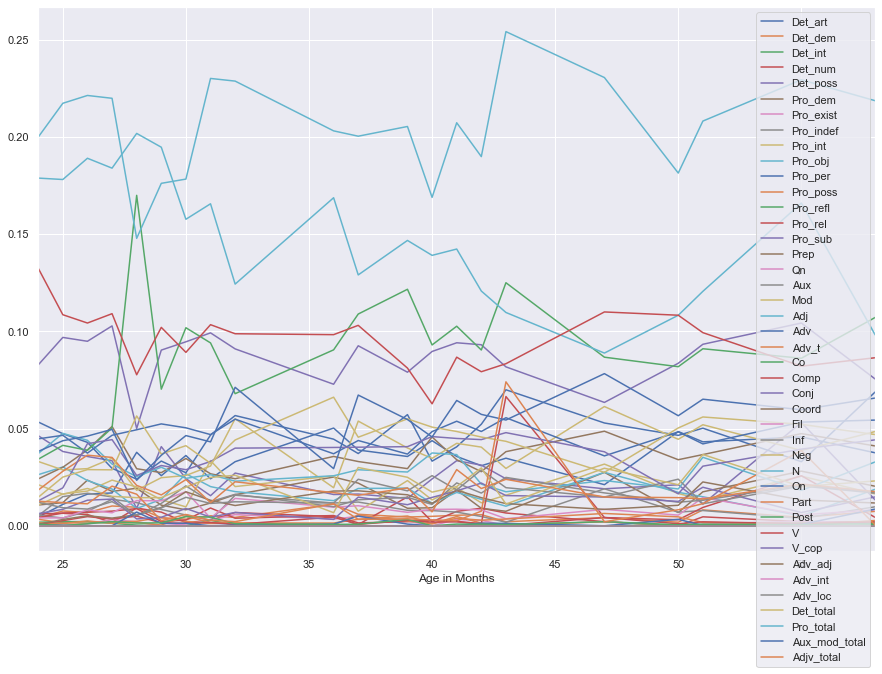

In [1981]:
all_ratio.plot(figsize=(15,10))

In [1982]:
all_totals = all_ratio.mean()
all_totals.sort_values(ascending=False).head(5)

Pro_total    0.205470
N            0.148139
V            0.095498
Co           0.088247
Pro_sub      0.086906
dtype: float64

# Content to function words types by age: evidence of grammatical transition

An important shift in the 24-60 month stage is the transition from content words to function words. It typically occurs at around thirty months.

We graph the proportion of <strong>content words</strong> to <strong>function words</strong>.  

It appears that at about <strong>32 months</strong>, the total of function words becomes greater than that of content words. (Function words include pronouns such as "I".)

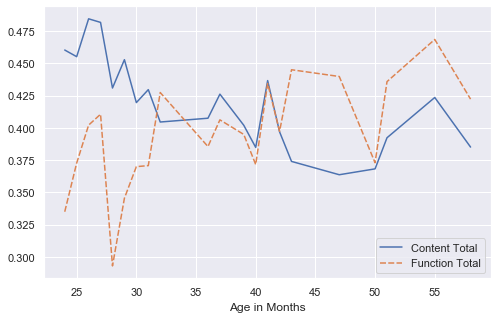

In [1983]:
sns.set(rc={"figure.figsize":(8, 5)})
sns.lineplot(data=con_fun_total)

### Function words: main classes.
It appears that the top three types of function words are the following:
- <strong>PRONOUNS</strong> (*I, you, he*)
- <strong>AUXILIARY VERBS</strong> (*can, will, don't*)
- <strong>DETERMINERS</strong> (*the*)

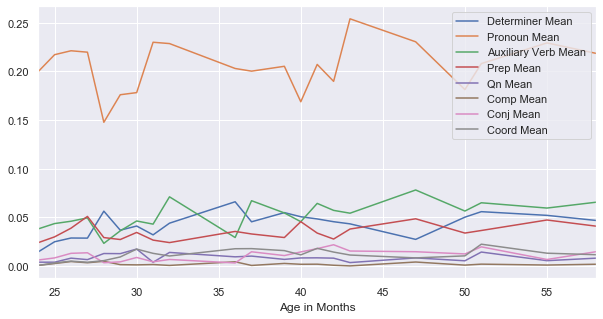

In [1984]:
functiontype_ratio.plot(figsize=(10,5))

Which *specific* subtypes of function words predominate? It appears that the top three categories are the following:
- <strong>pronoun subjects</strong>
- <strong>personal pronouns </strong>
- <strong>possessive determiners (e.g., *my*) </strong>

Children seem to talk a lot about animate subjects and possession. 

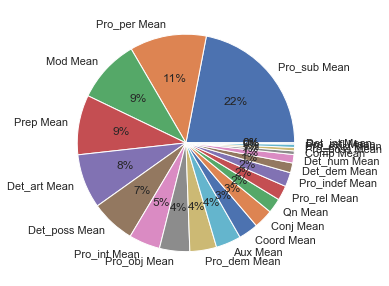

In [1985]:
function_totals = function_ratio.reset_index()
function_totals = function_totals.drop(['FTotal','Age in Months'],axis=1)
function_totals = function_totals.mean()
function_pie = pd.DataFrame({'Type':function_totals.index, 'Ratio':function_totals.values})
function_pie.loc[:,'Ratio'] = function_pie.loc[:,'Ratio'].div(function_totals.sum(), axis=0)
function_pie = function_pie.sort_values(by = 'Ratio',ascending=False)
plt.pie(function_pie['Ratio'], labels = function_pie['Type'], autopct='%.0f%%')
plt.show()

# Content words: main classes.

### Nouns, Verbs, and Adjectives
Content words can be grouped into <strong>nouns, verbs, </strong>and <strong> adverbs/adjectives</strong>.

Around <strong>30 months</strong> (the telegraphic to multiword utterances switch), <strong>the proportion of verbs</strong> begins to exceed the proportion of nouns.

(Note that pronouns are counted as function words and are not included in this count.) What is likely is that <strong>nouns (a content word) are being replaced with pronouns</strong>, which are more cohesive and grammatical, since they have reference.



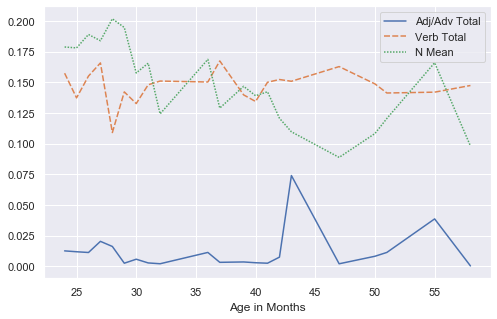

In [1986]:
sns.lineplot(data=contenttype_ratio)

## Verbs and total function words: more evidence of grammatical transition

Verbs are central to the acquisition of syntax. As verbs are central to an event, they encode argument order (which introduces hierarchical structure) as well as subcategorization.

The plot below indicates the total ratio of verbs produced in an experimental session compared to the total ratio of function words. It is suggestive that <strong>verbs facilitate the acquisition of function words</strong>, perhaps in part as they require the <strong>distinguishing of pronoun objects and subjects.</strong>

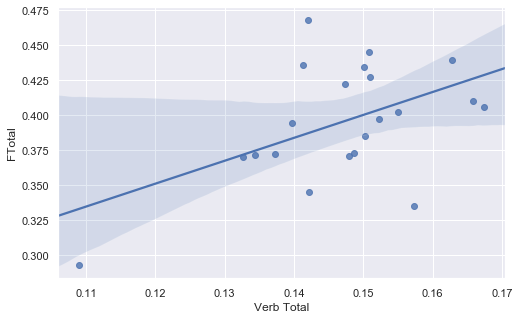

In [1987]:
verb_function = pd.DataFrame({
                        'Verb Total': contenttype_ratio['Verb Total'],
                        'FTotal': function_ratio['FTotal']})
sns.regplot(data=verb_function, x="Verb Total", y="FTotal")

## Nouns versus Pronouns: more evidence of grammatical transition 
Particularly around 30 months, there is a general trend of the increase in pronouns, which are cohesive and grammatical, as nouns decrease. (Children may be moving from calling things by their names (e.g., "cup") to their pronouns (e.g., "it").

This could reflect part of the semantic shift from particular-based names (and complexive concepts) to more conceptual semantic categories.  

Semantics and syntax may bootstrap onto one another, where the shift from particular to abstract in semantics aids the shift towards abstract categories needed for syntax. More specifically, the shift from a names to pronouns, although both NPs, is a form of shifting from content to function, which leads to the acquisition of more abstract functioal categories.

In [1988]:
# Compare nouns and pronouns over time

npn_ratio = pd.DataFrame({
                        "N Mean": N_MEANR,
                        "Pronoun Mean": PROTOTAL_MEANR,
                        })
npn_ratio = npn_ratio.reset_index()

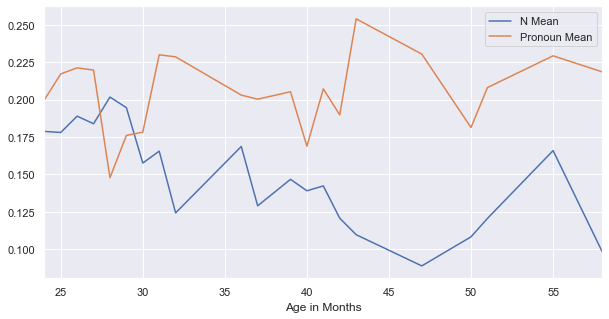

In [1989]:
npn_ratio = npn_ratio.set_index("Age in Months")
npn_ratio.plot(figsize=(10,5))

# Length of Utterance and Proportion of Content Words.

Children often differ in the amount of speech they porudce: some are early talkers, are others are late talkers.  

Length is a measure of the amount of speech per experimental session.  

The following graphs compares the amount of speech and the proportion of content/function words.  

- <strong>For sessions with less speech (perhaps late talkers):</strong> the proportion of content to function words seems to be to most pronounced, particularly prior to 30 months.
- <strong> For sessions with a medium amount of speech:</strong> the proportion of content to function words also shows a gap prior to 30 months, though it appears to be less pronounced than in the low speech category.
- <strong> For sessions with a high amount of speech: </strong> the proportion fo content to function words appears to be somewhat more balanced throughout, although the shift at 30 months is still apparent.

While statistical analyses need to be carried out, it seems a quick graphical exploration of utterance length and content words suggests a facilitative relationship between the two, where children with an earlier grasp of function words are able to produce longer sentences. 

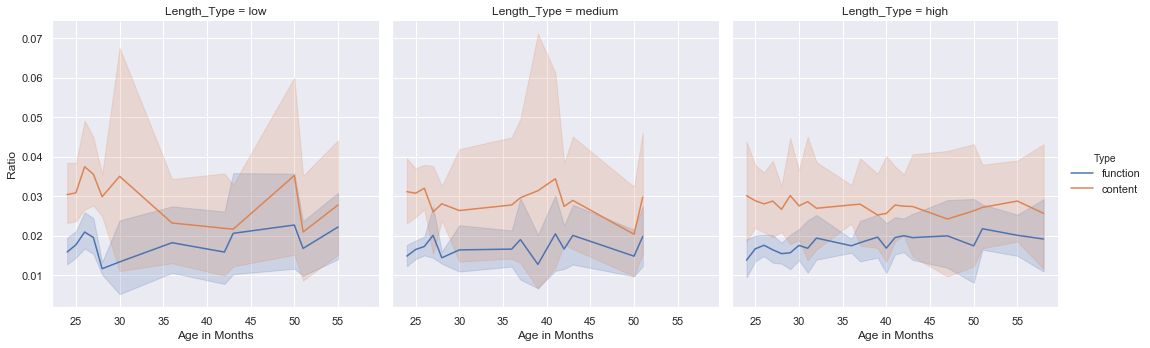

In [1990]:
graph = sns.FacetGrid(all_words, col ='Length_Type',hue='Type',height=5) 
graph.map(sns.lineplot, "Age in Months", "Ratio").add_legend()
plt.show()

## Wrapping it Up and Further Exploration.

The Braunwald corpus provides evidence for the grammatical transition from telegraphic to multiword utterances at around 26-32 months of age.  

A few interesting features emerged from this exploration:

<strong>1. The switch from content to function words is visible and crosses over at about 30 months.</strong> The acquisition of function words is central to the transition from the telegraphic stage to grammar.<p>
<strong>2. The shift from nouns to pronouns may be an early predictor of grammatical acquisition.</strong> A notable shift at around 30 months occured in the proportion of NPs that were names to pronouns. It may indicate a move towards abstraction and away from complexive concepts, suggesting that syntactic abstraction may bootstrap onto increasing semantic abstraction.<p>
<strong>3. Verbs appear to facilitate the grammatical shift.</strong> Verbs impose argument structure and subcategorization restraints, as well as the early distinction between pronoun subject/object, which is an early functional clss.<p>
<strong>4. Low, medium, and high talkers may have different proportions of content/function words.</strong> While it requires further statistical exploration, it appears that children who speak more have a more balanced proportion of content/function words earlier on, while children who speak less have a greater proportion of content words initially.  

Limitations include the small sample size of the Braunwald corpus (I was unable to use web scraping techniques effectively); a analysis with more data from the CHILDES corpus would be insightful.







## Bonus Graphs.

In [1991]:
# Compare types of pronouns used over time

pronoun_ratio = pd.DataFrame({
                        "Pro_dem Mean": PRODEM_MEANR,
                        "Pro_exist Mean": PROEXIST_MEANR,
                        "Pro_indef Mean": PROINDEF_MEANR,
                        "Pro_int Mean": PROINT_MEANR,
                        "Pro_obj Mean": PROOBJ_MEANR,
                        "Pro_per Mean": PROPER_MEANR,
                        "Pro_poss Mean": PROPOSS_MEANR,
                        "Pro_refl Mean": PROREFL_MEANR,
                        "Pro_rel Mean": PROREL_MEANR,
                        "Pro_sub Mean": PROSUB_MEANR,
                        })
pronoun_ratio = pronoun_ratio.reset_index()

In [ ]:
content_ratio = content_ratio.set_index('Age in Months')
content_ratio = content_ratio.drop("CTotal", axis=1)
content_ratio.plot(figsize=(10,5))

In [ ]:
pronoun_ratio = pronoun_ratio.set_index("Age in Months")
pronoun_ratio.plot(figsize=(10,5))

In [ ]:
# Compare types of determiners used over time

det_ratio = pd.DataFrame({
                        "Det_art Mean": DETART_MEANR,
                        "Det_dem Mean": DETDEM_MEANR,
                        "Det_int Mean": DETINT_MEANR,
                        "Det_num Mean": DETNUM_MEANR,
                        "Det_poss Mean": DETPOSS_MEANR,
                        "Qn Mean": QN_MEANR,
                        })
det_ratio = det_ratio.reset_index()

In [ ]:
det_ratio = det_ratio.set_index("Age in Months")
det_ratio.plot(figsize=(10,5))

In [ ]:
# Compare verb development over time

v_ratio = pd.DataFrame({
                        "V Mean": V_MEANR,
                        "V_cop Mean": VCOP_MEANR,
                        "Aux Mean": AUX_MEANR,
                        "Mod Mean": MOD_MEANR,
                        "Inf Mean": INF_MEANR,
                        })
v_ratio = v_ratio.reset_index()

In [ ]:
v_ratio = v_ratio.set_index("Age in Months")
v_ratio.plot(figsize=(10,5))

In [ ]:
# Adjective/adverb development over time

adjv_ratio = pd.DataFrame({
                        "Adv Mean": ADV_MEANR,
                        "Adv_t Mean": ADVT_MEANR,
                        "Adv_adj Mean": ADVADJ_MEANR,
                        "Adv_int Mean": ADVINT_MEANR,
                        "Adv_loc Mean": ADVLOC_MEANR,
                        'Adj Mean': ADJ_MEANR,
                        })
adjv_ratio = adjv_ratio.reset_index()

In [ ]:
adjv_ratio = adjv_ratio.set_index("Age in Months")
adjv_ratio.plot(figsize=(10,5))

In [ ]:
function_ratio = function_ratio.drop("FTotal", axis=1)
function_ratio.plot(figsize=(10,5))

In [ ]:
# writes data to a .CSV file
df.to_csv('corpus_totals.csv')
ratio.to_csv('corpus_ratios.csv')